<a href="https://colab.research.google.com/github/Gautam2001j/EDA-Exploratory-Data-Analysis-/blob/main/Ad_Hoc_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ad Hoc Exploratory Data Analysis of the survey
The ad hoc exploratory data analysis (EDA) aims to uncover insights from a survey conducted within the campus of the Birla Institute of Applied Sciences. In this survey, students are asked to provide information about the signal strength of their devices at various campus locations, the ASU (Arbitrary Strength Unit) values at those locations, and the corresponding geolocations. By analyzing this data, we can better understand the connectivity patterns across the campus, assess the quality of the wireless network, and identify potential areas for network optimization. The insights from this survey will help improve the overall digital infrastructure and connectivity for the campus community.

### Import
The code imports essential libraries for data analysis and visualization. It includes NumPy and pandas for data manipulation, matplotlib and plotly.express for creating plots, seaborn for statistical data visualization, and re for regular expression operations.


In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re

The code reads the survey data from a CSV file into a pandas DataFrame. The data contains responses from the "Ad Hoc Survey Data Collection Form," which will be used for analysis and exploration. The code df.head() displays the first few rows of the DataFrame, giving an overview of the data. Meanwhile, df.info() provides detailed information about the dataset, including the number of entries, column names, data types, and the presence of any missing values

In [ ]:
df = pd.read_csv("data/Ad Hoc Survey Data Collection Form (Responses) - Form Responses 1.csv")

In [ ]:
df.head()

,Timestamp,Name,Roll Number,Manufacturer/Parent Company of your Mobile,"Model Name (ex: Note 7, Iphone 15)",Service Provider 1,Service Provider 2,Signal Strength for Place 1,ASU for place 1,Geolocation of place 1,...,Geolocation of place 11,Signal Strength for Place 12,ASU for place 12,Geolocation of place 12,Signal Strength for Place 13,ASU for place 13,Geolocation of place 13,Signal Strength for Place 14,ASU for place 14,Geolocation of place 14
0,10/22/2024 16:06:10,Sambhav Gupta,210050101049,OnePlus,Nord CE3 Lite,Airtel,NaN,-105,35,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-89,51,29°21′30″ N 79°33′11″ E,-93,47,29°21′30″ N 79°33′11″ E,-77,64,29°21′28″ N 79°33′9″ E
1,10/22/2024 16:07:29,Devashish Dixit,210050101018,Apple,Iphone 13,Airtel,NaN,-111,29,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-87,53,29°21′30″ N 79°33′11″ E,-91,49,29°21′30″ N 79°33′11″ E,-84,56,29°21′28″ N 79°33′9″ E
2,10/22/2024 16:14:51,Priyanshi Kandpal,210050101044,Redmi,Note 9 pro,Vodafone IN,NaN,-83,15,"29°21'28""N 79°33'11""E",...,"29°21'25""N 79°33'10""E",-98,42,"29°21'28""N 79°33'11""E",-111,29,"29°21'32""N 79°33'11""E",-93,46,"29°21'25""N 79°33'7""E"
3,10/22/2024 16:14:57,Mayank Pant,210050101038,Realme,RMX3471,Airtel,NaN,-105,39,"29°21'34""N 79°33'3""E",...,"29°21'28""N 79°33'7""E",-96,44,"29°21'30""N 79°33'11""E",-91,41,"29°21'26""N 79°33'10""E",-75,65,"29°21'28""N 79°33'9""E"
4,10/22/2024 16:16:08,Gunjan Jeena,210050101024,Samsung,M34 5G,jio,NaN,-105,39,29°21′34″ N 79°33′3″ E,...,29°21′28″ N 79°33′7″ E,-96,44,29°21′30″ N 79°33′10″ E,-91,41,29°21′26″ N 79°33′10″ E,-75,65,29°21′28″ N 79°33′9″ E


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 49 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Timestamp                                   65 non-null     object
 1   Name                                        65 non-null     object
 2   Roll Number                                 65 non-null     int64 
 3   Manufacturer/Parent Company of your Mobile  65 non-null     object
 4   Model Name (ex: Note 7, Iphone 15)          65 non-null     object
 5   Service Provider 1                          64 non-null     object
 6   Service Provider 2                          23 non-null     object
 7   Signal Strength for Place 1                 65 non-null     object
 8   ASU for place 1                             65 non-null     object
 9   Geolocation of place 1                      65 non-null     object
 10  Signal Strength for Place 2 

### Data Cleaning

The code converts the 'Timestamp' column in the DataFrame to datetime format using pd.to_datetime(). The errors='coerce' argument ensures that any invalid or incorrect date formats are converted to NaT (Not a Time), preventing errors during the conversion process.

In [ ]:
# Convert Timestamp to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

The code performs data cleaning and transformation for the 'signal strength' and 'ASU' columns in the DataFrame:


1. It identifies the columns related to 'Signal Strength' and 'ASU' by filtering column names using startswith.
2. The astype(str) method is applied to convert the values in these columns to strings for further processing.
3. For 'Signal Strength' columns, it extracts numeric values (if any) using regular expressions and converts them to float.
4. For 'ASU' columns, it similarly extracts numeric values, fills missing values (NaN) with 0, and converts the results to integers.

This process ensures that the columns contain clean, numeric data for further analysis.

In [ ]:
# Remove non-numeric characters from 'signal strength' columns and convert to integers
signal_strength_columns = [col for col in df.columns if col.startswith('Signal Strength for Place')]
asu_columns = [col for col in df.columns if col.startswith('ASU for place')]
df[signal_strength_columns] = df[signal_strength_columns].astype(str)
df[asu_columns] = df[asu_columns].astype(str)
# Extract numeric values from 'signal strength' columns, convert to float, and handle NaNs
df[signal_strength_columns] = df[signal_strength_columns].apply(lambda x: x.str.extract(r'(-?\d+)')[0].astype(float))
# Extract numeric values from 'asu' columns, fill NaNs with 0, and convert to int
df[asu_columns] = df[asu_columns].apply(lambda x: x.str.extract(r'(\d+)')[0].fillna(0).astype(int))


The code removes any duplicate entries from the DataFrame using the drop_duplicates() method. The inplace=True argument ensures that the changes are applied directly to the original DataFrame, eliminating any rows that are exact duplicates based on all columns.

In [ ]:
# Remove any duplicate entries if they exist
df.drop_duplicates(inplace=True)

The code iterates through all columns in the DataFrame and checks if 'Geolocation' is part of the column name. For any such columns, it retrieves the first value (df[col].iloc[0]) and sets all entries in that column to this value. This effectively standardizes the geolocation values across the entire column, possibly indicating a common reference point or a placeholder for missing data.

In [ ]:
for col in df.columns:
    if 'Geolocation' in col:
        first_value = df[col].iloc[0]  # Get the first value in the column
        df[col] = first_value          # Set all entries in that column to this value

The code standardizes the values in the 'Service Provider 1' and 'Service Provider 2' columns by mapping different variants of service provider names to a consistent standard. It uses the provider_mapping dictionary, where each key represents a standardized provider name and the values are a list of possible variants. The standardize_provider() function checks if a provider name in the columns matches any variant in the dictionary and returns the standardized name. If no match is found, the original name is retained. This ensures consistency in the dataset for service provider names.

In [ ]:
provider_mapping = {
    'Airtel': ['Airtel', 'AIRTEL'],
    'Jio': ['jio', 'JIO', 'Jio'],
    'BSNL': ['Bsnl', 'BSNL'],
    'Vi': ['Vodafone IN', 'Vi', 'Vi India', 'vi']
}
# Function to map each provider to the standard names
def standardize_provider(provider_name):
    for standard_name, variants in provider_mapping.items():
        if provider_name in variants:
            return standard_name
    return provider_name  # If no match, return the original
# Apply the mapping to 'Service Provider 1' and 'Service Provider 2' columns
df['Service Provider 1'] = df['Service Provider 1'].apply(standardize_provider)
df['Service Provider 2'] = df['Service Provider 2'].apply(standardize_provider)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 49 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Timestamp                                   65 non-null     datetime64[ns]
 1   Name                                        65 non-null     object        
 2   Roll Number                                 65 non-null     int64         
 3   Manufacturer/Parent Company of your Mobile  65 non-null     object        
 4   Model Name (ex: Note 7, Iphone 15)          65 non-null     object        
 5   Service Provider 1                          64 non-null     object        
 6   Service Provider 2                          23 non-null     object        
 7   Signal Strength for Place 1                 64 non-null     float64       
 8   ASU for place 1                             65 non-null     int64         
 9   Geolocation 

The code filters the DataFrame to display rows where the "Signal Strength for Place 1" column has missing (null) values. It uses df["Signal Strength for Place 1"].isnull() to create a boolean mask, and then df[...] selects the rows where this condition is True. This helps in identifying and addressing any missing data in the specified column.

In [ ]:
df[df["Signal Strength for Place 1"].isnull()]

,Timestamp,Name,Roll Number,Manufacturer/Parent Company of your Mobile,"Model Name (ex: Note 7, Iphone 15)",Service Provider 1,Service Provider 2,Signal Strength for Place 1,ASU for place 1,Geolocation of place 1,...,Geolocation of place 11,Signal Strength for Place 12,ASU for place 12,Geolocation of place 12,Signal Strength for Place 13,ASU for place 13,Geolocation of place 13,Signal Strength for Place 14,ASU for place 14,Geolocation of place 14
31,2024-10-27 08:08:55,Manas Pant,210050101034,IQOO,Z6 Pro,Jio,-,NaN,0,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,77.0,63,29°21′30″ N 79°33′11″ E,NaN,0,29°21′30″ N 79°33′11″ E,NaN,0,29°21′28″ N 79°33′9″ E


In [ ]:
df.head()

,Timestamp,Name,Roll Number,Manufacturer/Parent Company of your Mobile,"Model Name (ex: Note 7, Iphone 15)",Service Provider 1,Service Provider 2,Signal Strength for Place 1,ASU for place 1,Geolocation of place 1,...,Geolocation of place 11,Signal Strength for Place 12,ASU for place 12,Geolocation of place 12,Signal Strength for Place 13,ASU for place 13,Geolocation of place 13,Signal Strength for Place 14,ASU for place 14,Geolocation of place 14
0,2024-10-22 16:06:10,Sambhav Gupta,210050101049,OnePlus,Nord CE3 Lite,Airtel,NaN,-105.0,35,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-89.0,51,29°21′30″ N 79°33′11″ E,-93.0,47,29°21′30″ N 79°33′11″ E,-77.0,64,29°21′28″ N 79°33′9″ E
1,2024-10-22 16:07:29,Devashish Dixit,210050101018,Apple,Iphone 13,Airtel,NaN,-111.0,29,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-87.0,53,29°21′30″ N 79°33′11″ E,-91.0,49,29°21′30″ N 79°33′11″ E,-84.0,56,29°21′28″ N 79°33′9″ E
2,2024-10-22 16:14:51,Priyanshi Kandpal,210050101044,Redmi,Note 9 pro,Vi,NaN,-83.0,15,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-98.0,42,29°21′30″ N 79°33′11″ E,-111.0,29,29°21′30″ N 79°33′11″ E,-93.0,46,29°21′28″ N 79°33′9″ E
3,2024-10-22 16:14:57,Mayank Pant,210050101038,Realme,RMX3471,Airtel,NaN,-105.0,39,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-96.0,44,29°21′30″ N 79°33′11″ E,-91.0,41,29°21′30″ N 79°33′11″ E,-75.0,65,29°21′28″ N 79°33′9″ E
4,2024-10-22 16:16:08,Gunjan Jeena,210050101024,Samsung,M34 5G,Jio,NaN,-105.0,39,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-96.0,44,29°21′30″ N 79°33′11″ E,-91.0,41,29°21′30″ N 79°33′11″ E,-75.0,65,29°21′28″ N 79°33′9″ E


### EDA(Exploratory Data Analysis)
The df.describe() function generates summary statistics for the numerical columns in the DataFrame. It provides insights such as:

*  Count: The number of non-null entries in each column.
*  Mean: The average value of each column.
*  Standard Deviation (std): The spread or dispersion of the values in each column.
*  Min: The minimum value in each column.
*  25th Percentile (25%): The value below which 25% of the data falls.
*  50th Percentile (50%): The median or middle value.
*  75th Percentile (75%): The value below which 75% of the data falls.
*  Max: The maximum value in each column.

This function helps quickly assess the distribution and central tendency of the data.


In [ ]:
# Summary Statistics
df.describe()

,Timestamp,Roll Number,Signal Strength for Place 1,ASU for place 1,Signal Strength for Place 2,ASU for place 2,Signal Strength for Place 3,ASU for place 3,Signal Strength for Place 4,ASU for place 4,...,Signal Strength for Place 10,ASU for place 10,Signal Strength for Place 11,ASU for place 11,Signal Strength for Place 12,ASU for place 12,Signal Strength for Place 13,ASU for place 13,Signal Strength for Place 14,ASU for place 14
count,65,6.500000e+01,64.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,64.000000,65.000000,64.000000,65.000000
mean,2024-10-30 02:38:13.184615168,2.414347e+11,-51.765625,41.446154,-53.369231,51.276923,-49.815385,50.184615,-50.107692,54.646154,...,-41.353846,55.923077,-31.569231,59.292308,-42.661538,54.138462,-44.750000,51.292308,-42.234375,58.584615
min,2024-10-22 16:06:10,2.100501e+11,-114.000000,0.000000,-114.000000,26.000000,-114.000000,26.000000,-122.000000,24.000000,...,-114.000000,28.000000,-96.000000,43.000000,-106.000000,34.000000,-111.000000,0.000000,-96.000000,0.000000
25%,2024-10-22 21:00:20,2.100501e+11,-105.000000,30.000000,-95.000000,43.000000,-95.000000,45.000000,-89.000000,51.000000,...,-85.000000,55.000000,-88.000000,50.000000,-90.000000,48.000000,-90.000000,48.000000,-85.000000,55.000000
50%,2024-10-26 15:03:05,2.100501e+11,-97.000000,39.000000,-92.000000,53.000000,-88.000000,50.000000,-83.000000,56.000000,...,-81.000000,56.000000,-72.000000,57.000000,-87.000000,50.000000,-83.000000,50.000000,-81.500000,60.000000
75%,2024-11-06 14:35:14,2.100501e+11,-81.250000,43.000000,-78.000000,57.000000,-77.000000,57.000000,-77.000000,60.000000,...,71.000000,60.000000,71.000000,71.000000,56.000000,63.000000,-38.500000,57.000000,-37.250000,63.000000
max,2024-11-07 00:16:09,7.200501e+11,110.000000,114.000000,94.000000,89.000000,106.000000,88.000000,122.000000,77.000000,...,97.000000,69.000000,97.000000,79.000000,101.000000,86.000000,97.000000,72.000000,93.000000,95.000000
std,NaN,1.235146e+11,86.446376,20.270076,73.415889,10.424592,77.804622,11.324603,70.623810,9.469409,...,74.491910,9.214980,77.248982,10.264811,76.229972,11.118505,75.214825,10.474259,71.004078,11.122742


The code generates two line plots to visualize the relationships between signal strength and ASU with their corresponding geolocations for Place 1. The first plot shows how "Signal Strength for Place 1" varies with the geolocation, while the second plot demonstrates the variation of "ASU for Place 1" with the same geolocation. Both plots help in understanding the connectivity patterns and signal quality across different locations within Place 1.

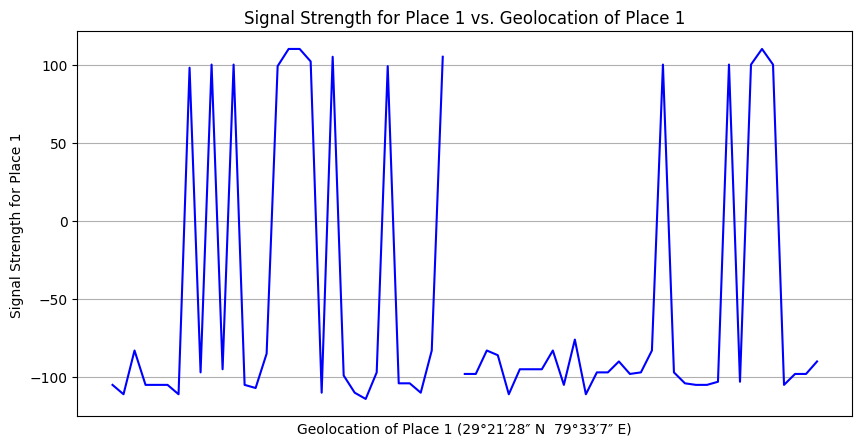

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["Signal Strength for Place 1"], color='b')
plt.xlabel(f"Geolocation of Place 1 ({df['Geolocation of place 1'].iloc[0]})")
plt.ylabel("Signal Strength for Place 1")
plt.title("Signal Strength for Place 1 vs. Geolocation of Place 1")
plt.xticks([])
plt.grid(True)
plt.show()

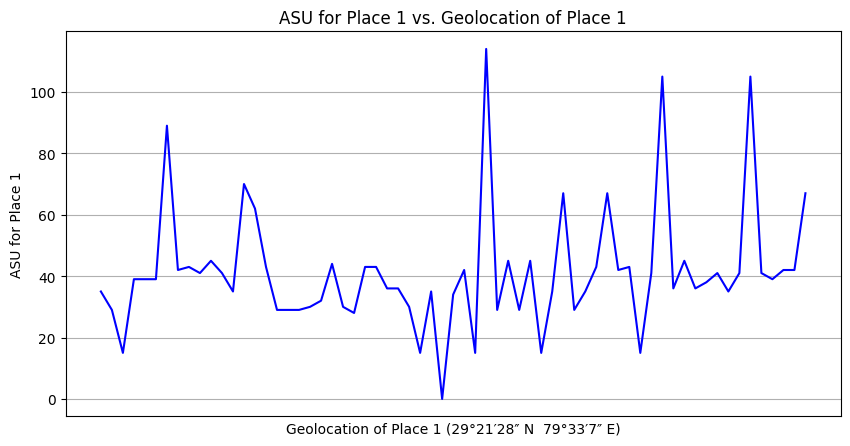

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["ASU for place 1"], color='b')
plt.xlabel(f"Geolocation of Place 1 ({df['Geolocation of place 1'].iloc[0]})")
plt.ylabel("ASU for Place 1")
plt.title("ASU for Place 1 vs. Geolocation of Place 1")
plt.xticks([])
plt.grid(True)
plt.show()

#### Analysis of whole data


The code selects columns starting with "Signal Strength for Place" and "Geolocation of place." It calculates the mean signal strength for each location to assess network performance and extracts unique geolocations from the first row of the geolocation columns. This provides insights into the average signal strength across various locations and identifies the distinct geolocation points for analysis.


In [ ]:
# Select columns that start with 'signal strength for place'
signal_strength_columns = [col for col in df.columns if col.startswith('Signal Strength for Place')]
# Calculate the mean for these columns
signal_strength_means = df[signal_strength_columns].mean()

In [ ]:
# Select columns that start with 'Geolocation of place'
geolocation_columns = [col for col in df.columns if col.startswith('Geolocation of place')]
# Extract unique values from the first Geolocation column as a list
unique_geolocations = df[geolocation_columns].iloc[0]

This code converts geolocation data from Degrees, Minutes, Seconds (DMS) format to Decimal Degrees (DD). It defines a function dms_to_dd() to handle the conversion and then processes each geolocation entry. Latitude and longitude values are extracted, converted to DD, and stored in separate lists (latitude and longitude). Additionally, unique_geolocations and signal_strength_means are converted to lists, ensuring compatibility for further operations like visualization or data export. The final output is the signal_strength_means list, which contains the average signal strength values for each location.

In [ ]:
def dms_to_dd(dms):
    """Convert DMS (Degrees, Minutes, Seconds) to Decimal Degrees."""
    pattern = r"(\d+)°(\d+)′(\d+)″\s*([NSEW])"
    match = re.match(pattern, dms)
    if not match:
        raise ValueError(f"Invalid DMS format: {dms}")
    degrees, minutes, seconds, direction = match.groups()
    dd = int(degrees) + int(minutes) / 60 + int(seconds) / 3600
    if direction in ['S', 'W']:  # South and West are negative
        dd = -dd
    return dd

latitude = []
longitude = []

for geo in unique_geolocations:
    lat_dms, lon_dms = geo.split()[:2], geo.split()[2:]  # Split into latitude and longitude parts
    lat_dd = dms_to_dd(" ".join(lat_dms))
    lon_dd = dms_to_dd(" ".join(lon_dms))
    latitude.append(lat_dd)
    longitude.append(lon_dd)

unique_geolocations = unique_geolocations.tolist()
signal_strength_means = signal_strength_means.tolist()

The below code ensures that all values in signal_strength_means are non-negative by using np.abs(). This is necessary because negative values can cause errors, such as the "Invalid element(s) received for the 'size' property of scattermapbox.marker" error. The size property in scatter mapbox must only contain non-negative values within the valid range [0, ∞]. Converting to absolute values ensures compatibility and prevents such errors during visualization.

In [ ]:
# Ensure sizes are non-negative
signal_strength_means = np.abs(signal_strength_means)

This code creates a new DataFrame named data using pd.DataFrame(). It organizes the processed information into four columns:

*  Geolocation: The original geolocation values (in DMS format).
*  Latitude: The converted latitude values in decimal degrees (DD).
*  Longitude: The converted longitude values in decimal degrees (DD).
*  Mean Signal Strength: The mean signal strength values for each geolocation.

This structured DataFrame is ideal for further analysis or visualization, such as plotting signal strength on a map.



In [ ]:
data = pd.DataFrame({
    "Geolocation": unique_geolocations,
    "Latitude": latitude,
    "Longitude": longitude,
    "Mean Signal Strength": signal_strength_means
})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geolocation           14 non-null     object 
 1   Latitude              14 non-null     float64
 2   Longitude             14 non-null     float64
 3   Mean Signal Strength  14 non-null     float64
dtypes: float64(3), object(1)
memory usage: 576.0+ bytes


The code creates two interactive scatter maps using Plotly's scatter_mapbox to visualize both mean signal strength and mean ASU (Access Signal Unit) across geolocations. Each point represents a geolocation, with the size and color of the points indicating the mean values for signal strength and ASU. The maps use the "Carto Positron" style, are centered based on the average latitude and longitude, and include hover information for geolocation, latitude, longitude, and the respective values. These visualizations help in understanding the distribution of signal quality and network strength across different campus locations.

In [ ]:
fig = px.scatter_mapbox(
    data,
    lat="Latitude",
    lon="Longitude",
    color="Mean Signal Strength",
    size="Mean Signal Strength",
    hover_name="Geolocation",
    hover_data={"Latitude": True, "Longitude": True, "Mean Signal Strength": True},
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    title="Mean Signal Strength Across Geolocations"
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=5,  # Adjust zoom level as needed
    mapbox_center={"lat": sum(latitude) / len(latitude), "lon": sum(longitude) / len(longitude)},
    height = 500,
    width = 800
)
fig.show()

This map visualizes the mean signal strength across various locations within the Birla Institute of Applied Sciences, Bhimtal campus. The color-coded dots indicate varying signal strengths, likely representing Wi-Fi or cellular network coverage. The map helps identify areas with strong and weak signal, potentially aiding in network optimization or troubleshooting.

In [ ]:
# Select columns that start with 'asu for place'
asu_columns = [col for col in df.columns if col.startswith('ASU for place')]
# Calculate the mean for these columns
asu_means = df[asu_columns].mean()
asu_means = asu_means.tolist()

In [ ]:
data['Mean ASU'] = asu_means
data.head()

,Geolocation,Latitude,Longitude,Mean Signal Strength,Mean ASU
0,29°21′28″ N 79°33′7″ E,29.357778,79.551944,51.765625,41.446154
1,29°21′26″ N 79°33′7″ E,29.357222,79.551944,53.369231,51.276923
2,29°21′25″ N 79°33′7″ E,29.356944,79.551944,49.815385,50.184615
3,29°21′22″ N 79°33′8″ E,29.356111,79.552222,50.107692,54.646154
4,29°21′20″ N 79°33′7″ E,29.355556,79.551944,46.723077,53.907692


In [ ]:
fig = px.scatter_mapbox(
    data,
    lat="Latitude",
    lon="Longitude",
    color="Mean ASU",
    size="Mean ASU",
    hover_name="Geolocation",
    hover_data={"Latitude": True, "Longitude": True, "Mean ASU":True},
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    title="Mean ASU Across Geolocations"
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=5,  # Adjust zoom level as needed
    mapbox_center={"lat": sum(latitude) / len(latitude), "lon": sum(longitude) / len(longitude)},
    height = 500,
    width = 800
)
fig.show()

The map depicts mean ASU (Arbitrary Strength Unit) across different geolocations within the Birla Institute of Applied Sciences, Bhimtal campus. The color-coded dots indicate varying ASU values, likely representing signal strength or network quality. The map helps identify areas with high and low ASU, potentially aiding in network optimization or troubleshooting.

The correlation matrix depicts the relationship between signal strength and ASU (Arbitrary Strength Unit) across 14 locations. Strong positive correlations (dark red) indicate that signal strength and ASU tend to increase or decrease together at those locations. Strong negative correlations (dark blue) suggest opposite trends.

Text(0.5, 1.0, 'Correlation Matrix for Signal Strength and ASU Across Locations')

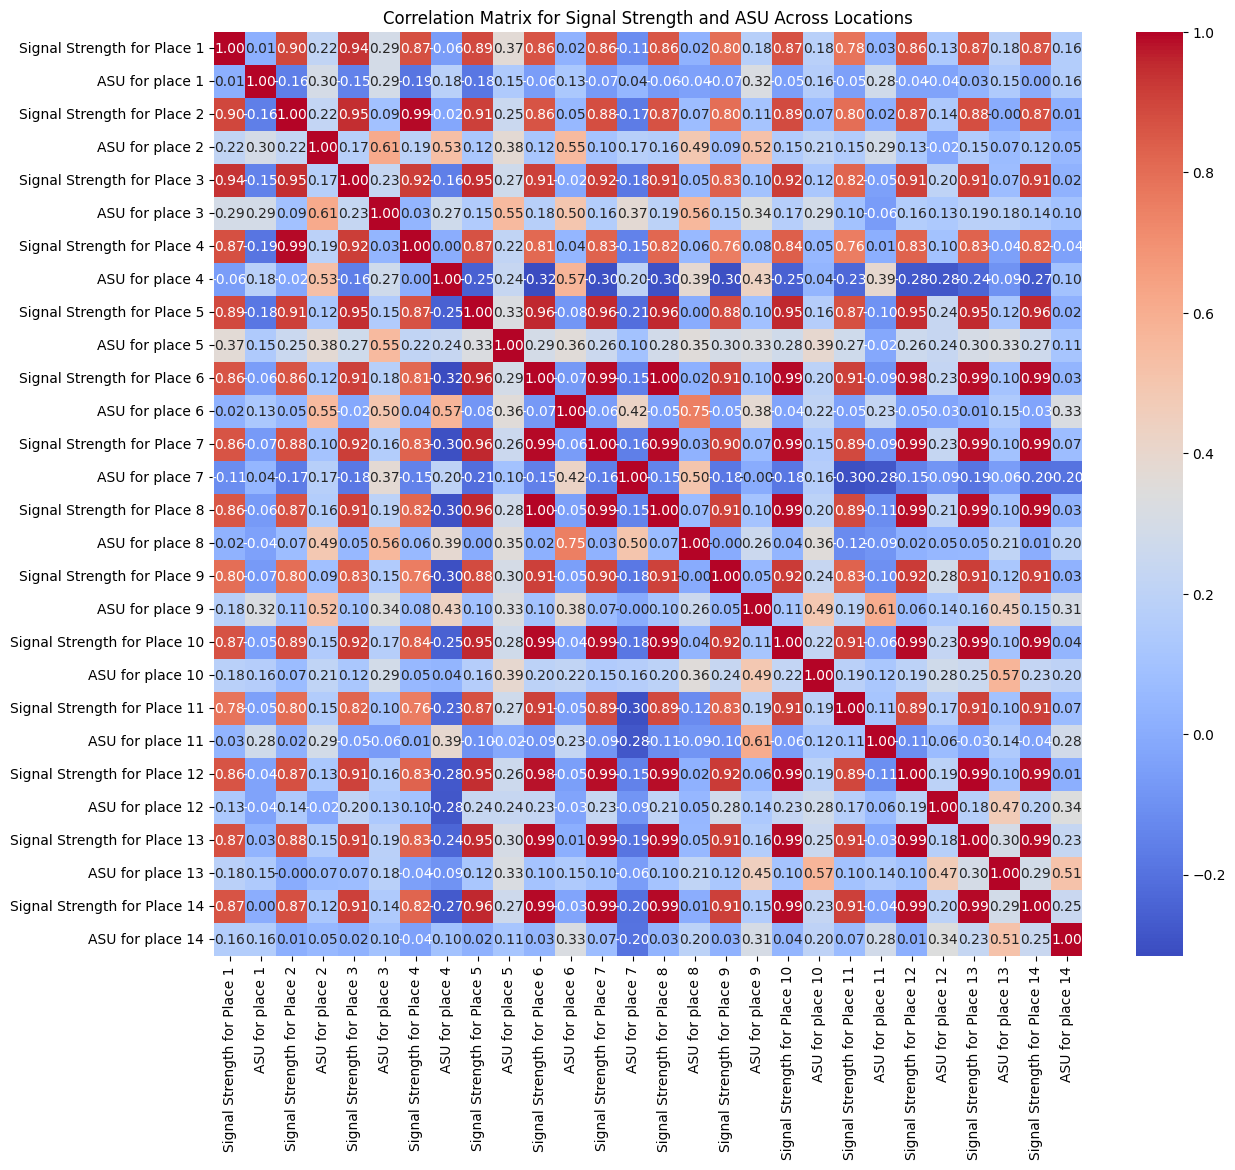

In [ ]:
# Correlation Analysis for Signal Strength and ASU across locations
corr_matrix = df.filter(regex="Signal Strength|ASU").corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Signal Strength and ASU Across Locations")

This heatmap illustrates the statistical relationship between signal strength and ASU (Arbitrary Strength Unit) values across 14 different locations. The color intensity and hue indicate the strength and direction of the correlation:

*  Dark Red: Strong Positive Correlation (values tend to increase together)
*  Light Red: Moderate Positive Correlation
*  White: No Correlation (values are independent)
*  Light Blue: Moderate Negative Correlation (values tend to decrease together)
*  Dark Blue: Strong Negative Correlation

Key Observations:

*  Diagonal: The diagonal line represents perfect correlation (1.0), as each location's data is compared to itself.
*  Off-Diagonal: These values show the correlation between different locations.
*  Strong Correlations: Certain pairs of locations exhibit strong positive or negative correlations, suggesting a strong relationship between their signal strength and ASU values.
*  Weak Correlations: Many pairs of locations show weak or no correlation, indicating that their signal strength and ASU values are not strongly related.


#### Analysis of Airtel Users


This code creates a new DataFrame df1 that filters the original df to include only the rows where the "Service Provider 1" column is equal to "Airtel." This allows you to focus on the data specifically related to Airtel as the service provider.

In [ ]:
df1 = df[df["Service Provider 1"] == "Airtel"]

In [ ]:
df1.head()

,Timestamp,Name,Roll Number,Manufacturer/Parent Company of your Mobile,"Model Name (ex: Note 7, Iphone 15)",Service Provider 1,Service Provider 2,Signal Strength for Place 1,ASU for place 1,Geolocation of place 1,...,Geolocation of place 11,Signal Strength for Place 12,ASU for place 12,Geolocation of place 12,Signal Strength for Place 13,ASU for place 13,Geolocation of place 13,Signal Strength for Place 14,ASU for place 14,Geolocation of place 14
0,2024-10-22 16:06:10,Sambhav Gupta,210050101049,OnePlus,Nord CE3 Lite,Airtel,NaN,-105.0,35,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-89.0,51,29°21′30″ N 79°33′11″ E,-93.0,47,29°21′30″ N 79°33′11″ E,-77.0,64,29°21′28″ N 79°33′9″ E
1,2024-10-22 16:07:29,Devashish Dixit,210050101018,Apple,Iphone 13,Airtel,NaN,-111.0,29,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-87.0,53,29°21′30″ N 79°33′11″ E,-91.0,49,29°21′30″ N 79°33′11″ E,-84.0,56,29°21′28″ N 79°33′9″ E
3,2024-10-22 16:14:57,Mayank Pant,210050101038,Realme,RMX3471,Airtel,NaN,-105.0,39,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-96.0,44,29°21′30″ N 79°33′11″ E,-91.0,41,29°21′30″ N 79°33′11″ E,-75.0,65,29°21′28″ N 79°33′9″ E
22,2024-10-23 11:12:39,Bhavya Pandey,210050101014,Apple,Iphone 14 plus,Airtel,NaN,-110.0,30,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-90.0,50,29°21′30″ N 79°33′11″ E,-90.0,48,29°21′30″ N 79°33′11″ E,-84.0,56,29°21′28″ N 79°33′9″ E
24,2024-10-23 19:31:18,Deependra Mehta,210050101017,Realme,Narzo 30,Airtel,NaN,-97.0,43,29°21′28″ N 79°33′7″ E,...,29°21′26″ N 79°33′11″ E,-90.0,50,29°21′30″ N 79°33′11″ E,-90.0,50,29°21′30″ N 79°33′11″ E,-85.0,55,29°21′28″ N 79°33′9″ E


The code df1.describe() generates summary statistics for the df1 DataFrame, which contains only rows where the "Service Provider 1" is "Airtel." It provides an overview of the numerical columns in the dataset, including measures like the count, mean, standard deviation, minimum, maximum, and quartiles (25%, 50%, and 75%) for each numeric column related to Airtel's service provider data. This helps to analyze the distribution and characteristics of the data for Airtel users.

In [ ]:
df1.describe()

,Timestamp,Roll Number,Signal Strength for Place 1,ASU for place 1,Signal Strength for Place 2,ASU for place 2,Signal Strength for Place 3,ASU for place 3,Signal Strength for Place 4,ASU for place 4,...,Signal Strength for Place 10,ASU for place 10,Signal Strength for Place 11,ASU for place 11,Signal Strength for Place 12,ASU for place 12,Signal Strength for Place 13,ASU for place 13,Signal Strength for Place 14,ASU for place 14
count,14,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2024-10-30 16:44:09.928571392,2.100501e+11,-73.785714,46.357143,-65.785714,48.571429,-66.285714,47.500000,-62.571429,52.714286,...,-37.142857,56.214286,-34.000000,57.428571,-37.500000,51.071429,-39.000000,49.285714,-35.714286,59.214286
min,2024-10-22 16:06:10,2.100501e+11,-111.000000,29.000000,-103.000000,37.000000,-107.000000,34.000000,-122.000000,24.000000,...,-86.000000,45.000000,-90.000000,45.000000,-96.000000,39.000000,-93.000000,41.000000,-85.000000,52.000000
25%,2024-10-23 13:17:18.750000128,2.100501e+11,-108.750000,31.250000,-94.000000,43.000000,-98.750000,41.250000,-85.000000,49.500000,...,-85.000000,55.000000,-84.000000,50.750000,-90.000000,46.500000,-91.000000,47.250000,-84.000000,56.000000
50%,2024-11-01 00:32:36.500000,2.100501e+11,-104.000000,38.500000,-92.000000,46.000000,-90.500000,47.000000,-82.000000,55.500000,...,-84.000000,56.000000,-83.500000,56.000000,-88.000000,50.000000,-90.000000,49.000000,-77.500000,58.000000
75%,2024-11-06 15:52:49,2.100501e+11,-97.000000,41.750000,-84.500000,54.500000,-83.000000,54.000000,-81.000000,59.000000,...,35.250000,57.750000,38.250000,63.000000,38.250000,52.500000,34.250000,50.000000,38.250000,63.750000
max,2024-11-07 00:16:09,2.100501e+11,105.000000,114.000000,94.000000,63.000000,91.000000,61.000000,97.000000,61.000000,...,84.000000,68.000000,90.000000,71.000000,101.000000,69.000000,97.000000,67.000000,80.000000,65.000000
std,NaN,1.766181e+01,75.011977,27.241391,65.595706,8.073835,66.911455,8.473942,64.409405,9.941588,...,76.644893,6.166642,78.566973,8.045202,84.358894,8.324794,83.707366,6.661353,74.559660,4.509453


In [ ]:
# Select columns that start with 'signal strength for place'
signal_strength_columns = [col for col in df1.columns if col.startswith('Signal Strength for Place')]
# Calculate the mean for these columns
signal_strength_means = df1[signal_strength_columns].mean()
signal_strength_means = np.abs(signal_strength_means)

In [ ]:
data1 = pd.DataFrame({
    "Geolocation": unique_geolocations,
    "Latitude": latitude,
    "Longitude": longitude,
    "Mean Signal Strength": signal_strength_means
})
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Signal Strength for Place 1 to Signal Strength for Place 14
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geolocation           14 non-null     object 
 1   Latitude              14 non-null     float64
 2   Longitude             14 non-null     float64
 3   Mean Signal Strength  14 non-null     float64
dtypes: float64(3), object(1)
memory usage: 560.0+ bytes


In [ ]:
fig = px.scatter_mapbox(
    data1,
    lat="Latitude",
    lon="Longitude",
    color="Mean Signal Strength",
    size="Mean Signal Strength",
    hover_name="Geolocation",
    hover_data={"Latitude": True, "Longitude": True, "Mean Signal Strength": True},
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    title="Mean Signal Strength Across Geolocations of Airtel Users"
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=5,  # Adjust zoom level as needed
    mapbox_center={"lat": sum(latitude) / len(latitude), "lon": sum(longitude) / len(longitude)},
    height = 500,
    width = 800
)
fig.show()

The two signal strength images provide different perspectives on network coverage within the campus. Previous one in which all network users are included shows the overall signal strength, revealing areas with strong and weak signals across all providers. But this map shows specific to Airtel users, indicates more consistent coverage but with potential hotspots and weaker areas.
Comparing the two helps identify areas requiring network optimization, such as boosting weak signals or improving specific provider coverage. However, it's important to note that factors like time of day and environmental conditions can influence signal strength, and the accuracy of measurements may vary.

In [ ]:
# Select columns that start with 'asu for place'
asu_columns = [col for col in df1.columns if col.startswith('ASU for place')]
# Calculate the mean for these columns
asu_means = df1[asu_columns].mean()
asu_means = asu_means.tolist()

In [ ]:
data1['Mean ASU'] = asu_means
data1.head()

,Geolocation,Latitude,Longitude,Mean Signal Strength,Mean ASU
Signal Strength for Place 1,29°21′28″ N 79°33′7″ E,29.357778,79.551944,73.785714,46.357143
Signal Strength for Place 2,29°21′26″ N 79°33′7″ E,29.357222,79.551944,65.785714,48.571429
Signal Strength for Place 3,29°21′25″ N 79°33′7″ E,29.356944,79.551944,66.285714,47.500000
Signal Strength for Place 4,29°21′22″ N 79°33′8″ E,29.356111,79.552222,62.571429,52.714286
Signal Strength for Place 5,29°21′20″ N 79°33′7″ E,29.355556,79.551944,50.071429,53.285714


In [ ]:
fig = px.scatter_mapbox(
    data1,
    lat="Latitude",
    lon="Longitude",
    color="Mean ASU",
    size="Mean ASU",
    hover_name="Geolocation",
    hover_data={"Latitude": True, "Longitude": True, "Mean ASU":True},
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    title="Mean ASU Across Geolocations of Airtel USers"
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=5,  # Adjust zoom level as needed
    mapbox_center={"lat": sum(latitude) / len(latitude), "lon": sum(longitude) / len(longitude)},
    height = 500,
    width = 800
)
fig.show()

This image reveals the mean Average Signal Unit (ASU) across different locations within the Birla Institute of Applied Sciences (BIAS) campus in Bhimtal. ASU measures signal strength, with higher values indicating better signal quality. The map showcases the mean ASU values for various areas within the campus.

Text(0.5, 1.0, 'Correlation Matrix for Signal Strength and ASU Across Locations of Airtel Users')

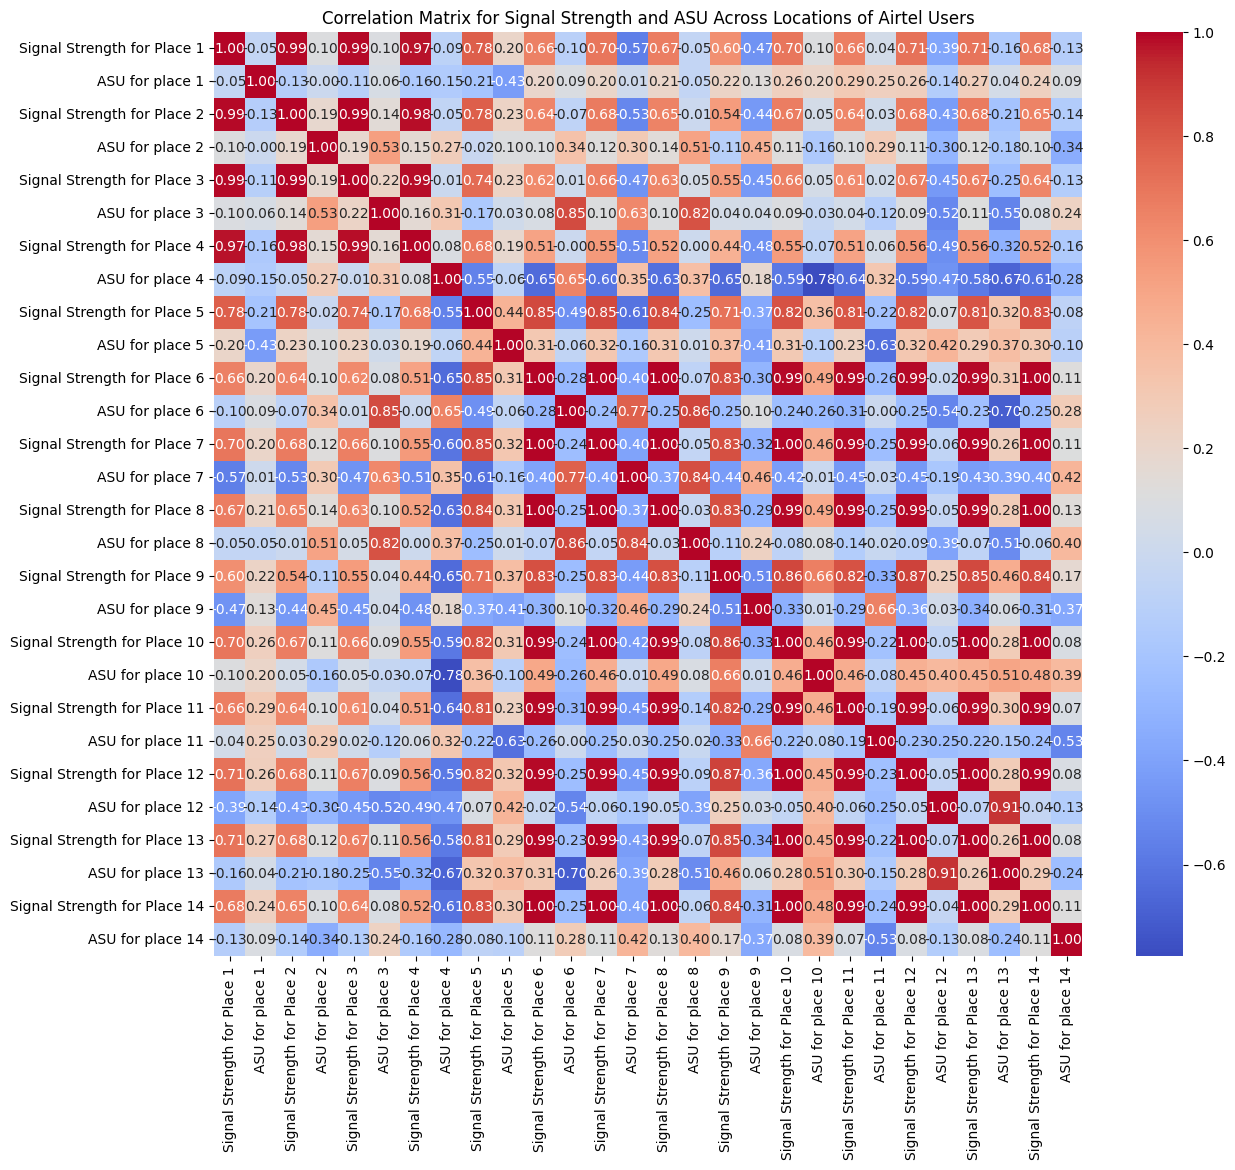

In [ ]:
# Correlation Analysis for Signal Strength and ASU across locations of Airtel users
corr_matrix = df1.filter(regex="Signal Strength|ASU").corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Signal Strength and ASU Across Locations of Airtel Users")

The correlation matrix reveals the relationship between signal strength and ASU across different locations. Higher ASU values indicate better signal quality. The matrix shows a positive correlation between signal strength and ASU, meaning that as signal strength increases, ASU also tends to increase. However, the correlation varies across locations, with some showing stronger relationships than others.


### Conclusion

In conclusion, the comprehensive data analysis conducted within the campus of the Birla Institute of Applied Sciences provides valuable insights into the signal strength, ASU (Arbitrary Strength Unit), and geolocation patterns across different locations. By analyzing these factors, we can assess the overall quality of the wireless network, identify areas with strong or weak signal coverage, and determine the effectiveness of different service providers, such as Airtel, Jio, BSNL, and Vi.
The exploratory analysis also highlights trends in network performance, with visualizations offering a clear understanding of how signal strength and ASU vary across the campus. This analysis serves as a foundation for making informed decisions on potential areas for network optimization and infrastructure improvements, ultimately leading to a better connectivity experience for the campus community.